# Zaawansowane operacje na tabeli CAS

In [1]:
import swat
s = swat.CAS('localhost', 5570)

In [2]:
iris = s.upload_file('../../dane/iris.csv', casout=dict(name='IRIS',caslib='CASUSER', replace=True))

NOTE: Cloud Analytic Services made the uploaded file available as table IRIS in caslib CASUSER(fl0r3k).
NOTE: The table IRIS has been created in caslib CASUSER(fl0r3k) from binary data uploaded to Cloud Analytic Services.


In [3]:
cars = s.upload_file('../../dane/cars.csv', casout=dict(name='CARS',caslib='CASUSER', replace=True))

NOTE: Cloud Analytic Services made the uploaded file available as table CARS in caslib CASUSER(fl0r3k).
NOTE: The table CARS has been created in caslib CASUSER(fl0r3k) from binary data uploaded to Cloud Analytic Services.


## Podstawowe statystyki

Za pomocą funkcji `discribe` można przywołać podstawowe statystyki.

In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Jeżeli zainteresowani jesteśmy konkretnymi percentylami:

In [5]:
iris.describe(percentiles=[0.3, 0.8])

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
30%,5.250000,2.800000,1.700000,0.400000
50%,5.800000,3.000000,4.350000,1.300000
80%,6.550000,3.400000,5.350000,1.900000
max,7.900000,4.400000,6.900000,2.500000


W describe możemy poprosić o analizę zmiennych tyu numerycznego albo znakowego.

In [6]:
iris.describe(include='character')

,variety
count,150
unique,3
top,Virginica
freq,50


In [7]:
iris.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,variety
count,150,150,150,150,150
unique,35,23,43,22,3
top,5,3,1.5,0.2,Virginica
freq,10,26,13,29,50
mean,5.84333,3.05733,3.758,1.19933,NaN
std,0.828066,0.435866,1.7653,0.762238,NaN
min,4.3,2,1,0.1,Setosa
25%,5.1,2.8,1.6,0.3,NaN
50%,5.8,3,4.35,1.3,NaN
75%,6.4,3.3,5.1,1.8,NaN


In [8]:
iris.describe(include=['numeric', 'character'])

,sepal_length,sepal_width,petal_length,petal_width,variety
count,150,150,150,150,150
unique,35,23,43,22,3
top,5,3,1.5,0.2,Virginica
freq,10,26,13,29,50
mean,5.84333,3.05733,3.758,1.19933,NaN
std,0.828066,0.435866,1.7653,0.762238,NaN
min,4.3,2,1,0.1,Setosa
25%,5.1,2.8,1.6,0.3,NaN
50%,5.8,3,4.35,1.3,NaN
75%,6.4,3.3,5.1,1.8,NaN


Typy statystyk też można wyspecyfikować

In [9]:
iris.describe(stats=['count', 'nmiss', 'sum', 'probt', 'freq'])

,sepal_length,sepal_width,petal_length,petal_width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
nmiss,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
sum,8.765000e+02,4.586000e+02,5.637000e+02,1.799000e+02
probt,3.331256e-129,8.004458e-129,2.166017e-57,2.659021e-42
freq,1.000000e+01,2.600000e+01,1.300000e+01,2.900000e+01


Wszystkie statysyki:

In [10]:
iris.describe(stats='all')

,sepal_length,sepal_width,petal_length,petal_width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
unique,3.500000e+01,2.300000e+01,4.300000e+01,2.200000e+01
mean,5.843333e+00,3.057333e+00,3.758000e+00,1.199333e+00
std,8.280661e-01,4.358663e-01,1.765298e+00,7.622377e-01
min,4.300000e+00,2.000000e+00,1.000000e+00,1.000000e-01
25%,5.100000e+00,2.800000e+00,1.600000e+00,3.000000e-01
50%,5.800000e+00,3.000000e+00,4.350000e+00,1.300000e+00
75%,6.400000e+00,3.300000e+00,5.100000e+00,1.800000e+00
max,7.900000e+00,4.400000e+00,6.900000e+00,2.500000e+00
nmiss,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


Pojedyncze statystyki można uruchamiać niezależnie.

In [11]:
iris.count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
variety         150
dtype: int64

In [12]:
iris.mean()

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [13]:
iris.probt()

sepal_length    3.331256e-129
sepal_width     8.004458e-129
petal_length     2.166017e-57
petal_width      2.659021e-42
dtype: float64

itd.

## Zestaw akcji - simple

Posiadając załadowaną tabelę możemy wykonywać na niej akcje. Zapoznajmy się z zestawem podstawowych akcji o nazwie **simple**

In [14]:
s.simple?

### **simple.numRows** - liczba wierszy

In [15]:
iris.numRows()

[numrows]

 150

+ Elapsed: 0.000257s, sys: 0.000248s, mem: 0.298mb

### **simple.distinct** - liczba unikalnych wartości

In [16]:
iris.distinct()

,Column,NDistinct,NMiss,Trunc
0,sepal_length,35.0,0.0,0.0
1,sepal_width,23.0,0.0,0.0
2,petal_length,43.0,0.0,0.0
3,petal_width,22.0,0.0,0.0
4,variety,3.0,0.0,0.0


Jako parametr możemy podać listę interesujących nas zmiennych. Bardzo wiele akcji ma możliwość ustawienia tego parametru.

In [17]:
iris.distinct(inputs=['variety','sepal_width'])

,Column,NDistinct,NMiss,Trunc
0,variety,3.0,0.0,0.0
1,sepal_width,23.0,0.0,0.0


### **simple.summary** - statystyki opisowe

In [18]:
iris.summary()

,Column,Min,Max,N,NMiss,Mean,Sum,Std,StdErr,Var,USS,CSS,CV,TValue,ProbT,Skewness,Kurtosis
0,sepal_length,4.3,7.9,150.0,0.0,5.843333,876.5,0.828066,0.067611,0.685694,5223.85,102.168333,14.171126,86.425375,3.331256e-129,0.314911,-0.552064
1,sepal_width,2.0,4.4,150.0,0.0,3.057333,458.6,0.435866,0.035588,0.189979,1430.40,28.306933,14.256420,85.908304,8.004458e-129,0.318966,0.228249
2,petal_length,1.0,6.9,150.0,0.0,3.758000,563.7,1.765298,0.144136,3.116278,2582.71,464.325400,46.974407,26.072599,2.166017e-57,-0.274884,-1.402103
3,petal_width,0.1,2.5,150.0,0.0,1.199333,179.9,0.762238,0.062236,0.581006,302.33,86.569933,63.555114,19.270595,2.659021e-42,-0.102967,-1.340604


Akcja **summary** może przyjąć parametry np. `subSet` do wyboru statystyk i `inputs` do wyboru zmiennych

In [19]:
iris.summary(
    inputs=['sepal_length', 'sepal_width'],
    subSet=['MEAN', 'STD']
)

,Column,Mean,Std
0,sepal_length,5.843333,0.828066
1,sepal_width,3.057333,0.435866


### **simple.freq** - tabele częstości

In [20]:
cars.freq(inputs='type')

,Column,CharVar,FmtVar,Level,Frequency
0,Type,Hybrid,Hybrid,1,3.0
1,Type,Sedan,Sedan,2,262.0
2,Type,Sports,Sports,3,49.0
3,Type,SUV,SUV,4,60.0
4,Type,Truck,Truck,5,24.0
5,Type,Wagon,Wagon,6,30.0


In [21]:
cars.freq(inputs=['type','origin'])

,Column,CharVar,FmtVar,Level,Frequency
0,Type,Hybrid,Hybrid,1,3.0
1,Type,Sedan,Sedan,2,262.0
2,Type,Sports,Sports,3,49.0
3,Type,SUV,SUV,4,60.0
4,Type,Truck,Truck,5,24.0
5,Type,Wagon,Wagon,6,30.0
6,Origin,Asia,Asia,1,158.0
7,Origin,Europe,Europe,2,123.0
8,Origin,USA,USA,3,147.0


### **simple.mdSummary** - wielowymiarowe statystyki opisowe

In [22]:
cars.mdSummary(inputs='mpg_highway',
               sets=[
                   {'groupBy':{'Origin'}},
                   {'groupBy':{'Origin','Type'}}],
               subset=['MAX', 'MIN', 'MEAN', 'STD', 'STDERR', 'VAR', 'N'])

[ByGroupSet1.ByGroupInfo]

 ByGroupSet1.ByGroupInfo
 
    Origin Origin_f   _key_
 0    Asia     Asia    Asia
 1  Europe   Europe  Europe
 2     USA      USA     USA

[ByGroupSet1.ByGroup1.MDSummary]

 Descriptive Statistics for CARS
 
              Column   Min   Max      N       Mean       Std    StdErr  \
 Origin                                                                  
 Asia    MPG_Highway  17.0  66.0  158.0  28.265823  6.770503  0.538632   
 
               Var  
 Origin             
 Asia    45.839716  

[ByGroupSet1.ByGroup2.MDSummary]

 Descriptive Statistics for CARS
 
              Column   Min   Max      N      Mean       Std    StdErr  \
 Origin                                                                 
 Europe  MPG_Highway  14.0  46.0  123.0  26.00813  4.167588  0.375779   
 
               Var  
 Origin             
 Europe  17.368786  

[ByGroupSet1.ByGroup3.MDSummary]

 Descriptive Statistics for CARS
 
              Column   Min   Max      N       Mean       Std    StdErr  \
 Origin                                                                  
 USA     MPG_Highway  12.0  37.0  147.0  26.013605  5.396582  0.445103   
 
               Var  
 Origin             
 USA     29.123101  

[ByGroupSet2.ByGroupInfo]

 ByGroupSet2.ByGroupInfo
 
     Origin Origin_f    Type  Type_f         _key_
 0     Asia     Asia  Hybrid  Hybrid  Asia  Hybrid
 1     Asia     Asia     SUV     SUV     Asia  SUV
 2     Asia     Asia   Sedan   Sedan   Asia  Sedan
 3     Asia     Asia  Sports  Sports  Asia  Sports
 4     Asia     Asia   Truck   Truck   Asia  Truck
 5     Asia     Asia   Wagon   Wagon   Asia  Wagon
 6   Europe   Europe     SUV     SUV     EuropeSUV
 7   Europe   Europe   Sedan   Sedan   EuropeSedan
 8   Europe   Europe  Sports  Sports  EuropeSports
 9   Europe   Europe   Wagon   Wagon   EuropeWagon
 10     USA      USA     SUV     SUV     USA   SUV
 11     USA      USA   Sedan   Sedan   USA   Sedan
 12     USA      USA  Sports  Sports  USA   Sports
 13     USA      USA   Truck   Truck   USA   Truck
 14     USA      USA   Wagon   Wagon   USA   Wagon

[ByGroupSet2.ByGroup1.MDSummary]

 Descriptive Statistics for CARS
 
                     Column   Min   Max    N  Mean       Std  StdErr   Var
 Origin Type                                                              
 Asia   Hybrid  MPG_Highway  51.0  66.0  3.0  56.0  8.660254     5.0  75.0

[ByGroupSet2.ByGroup2.MDSummary]

 Descriptive Statistics for CARS
 
                   Column   Min   Max     N   Mean       Std    StdErr   Var
 Origin Type                                                                
 Asia   SUV   MPG_Highway  17.0  27.0  25.0  21.68  3.009983  0.601997  9.06

[ByGroupSet2.ByGroup3.MDSummary]

 Descriptive Statistics for CARS
 
                    Column   Min   Max     N       Mean       Std    StdErr  \
 Origin Type                                                                  
 Asia   Sedan  MPG_Highway  22.0  44.0  94.0  29.968085  4.884587  0.503807   
 
                     Var  
 Origin Type              
 Asia   Sedan  23.859186  

[ByGroupSet2.ByGroup4.MDSummary]

 Descriptive Statistics for CARS
 
                     Column   Min   Max     N       Mean       Std    StdErr  \
 Origin Type                                                                   
 Asia   Sports  MPG_Highway  23.0  33.0  17.0  26.647059  2.714341  0.658324   
 
                     Var  
 Origin Type              
 Asia   Sports  7.367647  

[ByGroupSet2.ByGroup5.MDSummary]

 Descriptive Statistics for CARS
 
                    Column   Min   Max    N  Mean       Std    StdErr  \
 Origin Type                                                            
 Asia   Truck  MPG_Highway  17.0  29.0  8.0  22.0  5.070926  1.792843   
 
                     Var  
 Origin Type              
 Asia   Truck  25.714286  

[ByGroupSet2.ByGroup6.MDSummary]

 Descriptive Statistics for CARS
 
                    Column   Min   Max     N       Mean       Std   StdErr

### Wykresy z danych CASTable

In [23]:
iris.plot()

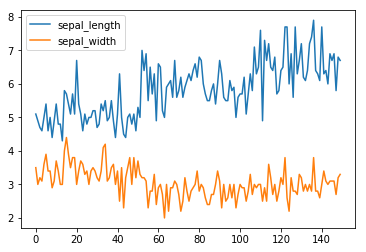

In [24]:
iris[['sepal_length', 'sepal_width']].plot()

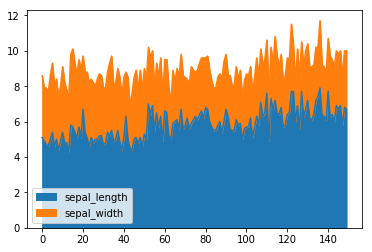

In [25]:
iris[['sepal_length', 'sepal_width']].plot(kind='area')

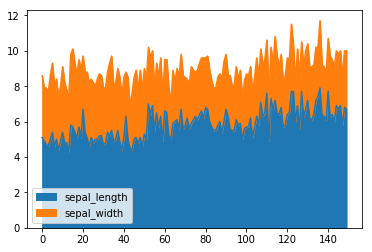

In [26]:
iris[['sepal_length', 'sepal_width']].plot.area()

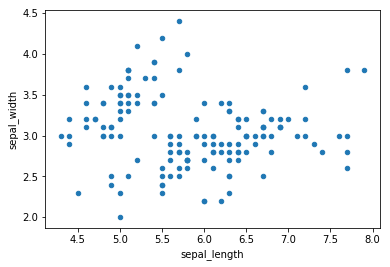

In [27]:
iris.plot.scatter('sepal_length', 'sepal_width')

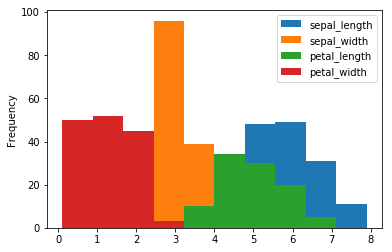

In [28]:
iris.plot.hist()

### Zapisywanie tabeli na dysk

In [29]:
iris.save(name='irisout.csv', caslib='CASUSER', replace=True)

NOTE: Cloud Analytic Services saved the file irisout.csv in caslib CASUSER(fl0r3k).


[caslib]

 'CASUSER(fl0r3k)'

[name]

 'irisout.csv'

+ Elapsed: 0.00112s, user: 4.9e-05s, sys: 0.00105s, mem: 2.42mb

In [30]:
iris.save(name='irisout.sashdat', caslib='CASUSER', replace=True)

NOTE: Cloud Analytic Services saved the file irisout.sashdat in caslib CASUSER(fl0r3k).


[caslib]

 'CASUSER(fl0r3k)'

[name]

 'irisout.sashdat'

+ Elapsed: 0.00678s, user: 0.000284s, sys: 0.000647s, mem: 16.4mb

Zapisane pliki w bibliotece możemy podejrzeć za pomocą akcji `table.fileInfo`

In [31]:
s.table.fileInfo()

,Permission,Owner,Group,Name,Size,Encryption,Time
0,-rwxr-xr-x,fl0r3k,fl0r3k,irisout.sashdat,17640,NONE,03Apr2018:19:55:07
1,-rw-rw-r--,fl0r3k,fl0r3k,iris.csv,3976,,21Mar2018:19:01:15
2,-rwxr-xr-x,fl0r3k,fl0r3k,irisout.csv,3716,,03Apr2018:19:55:07


In [32]:
s.table.tableInfo()

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,ModTime,AccessTime,Global,Repeated,View,SourceName,SourceCaslib,Compressed,Creator,Modifier
0,IRIS,150,5,0,utf-8,03Apr2018:19:55:04,03Apr2018:19:55:04,03Apr2018:19:55:07,UTF8,1.838405e+09,1.838405e+09,1.838405e+09,0,0,0,,,0,fl0r3k,
1,CARS,428,15,0,utf-8,03Apr2018:19:55:04,03Apr2018:19:55:04,03Apr2018:19:55:05,UTF8,1.838405e+09,1.838405e+09,1.838405e+09,0,0,0,,,0,fl0r3k,


## Sortowanie, wybieranie danych oraz iterowanie

### Pobieranie danych posortowanych

In [33]:
iris.sort_values(['sepal_length', 'sepal_width'])

CASTable('IRIS', caslib='CASUSER(fl0r3k)').sort_values(['sepal_length', 'sepal_width'])

In [34]:
irisSorted = iris.sort_values(['sepal_length', 'sepal_width'])
irisSorted

CASTable('IRIS', caslib='CASUSER(fl0r3k)').sort_values(['sepal_length', 'sepal_width'])

In [35]:
irisSorted.head(10)

,sepal_length,sepal_width,petal_length,petal_width,variety
0,4.3,3.0,1.1,0.1,Setosa
1,4.4,2.9,1.4,0.2,Setosa
2,4.4,3.0,1.3,0.2,Setosa
3,4.4,3.2,1.3,0.2,Setosa
4,4.5,2.3,1.3,0.3,Setosa
5,4.6,3.1,1.5,0.2,Setosa
6,4.6,3.2,1.4,0.2,Setosa
7,4.6,3.4,1.4,0.3,Setosa
8,4.6,3.6,1.0,0.2,Setosa
9,4.7,3.2,1.6,0.2,Setosa


In [36]:
irisSorted.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,variety
145,7.7,2.6,6.9,2.3,Virginica
146,7.7,2.8,6.7,2.0,Virginica
147,7.7,3.0,6.1,2.3,Virginica
148,7.7,3.8,6.7,2.2,Virginica
149,7.9,3.8,6.4,2.0,Virginica


In [37]:
irisSorted = iris.sort_values(['sepal_length', 'sepal_width'], ascending=[False, True])
irisSorted

CASTable('IRIS', caslib='CASUSER(fl0r3k)').sort_values(['sepal_length', 'sepal_width'], ascending=[False, True])

In [38]:
irisSorted.head(10)

,sepal_length,sepal_width,petal_length,petal_width,variety
0,7.9,3.8,6.4,2.0,Virginica
1,7.7,2.6,6.9,2.3,Virginica
2,7.7,2.8,6.7,2.0,Virginica
3,7.7,3.0,6.1,2.3,Virginica
4,7.7,3.8,6.7,2.2,Virginica
5,7.6,3.0,6.6,2.1,Virginica
6,7.4,2.8,6.1,1.9,Virginica
7,7.3,2.9,6.3,1.8,Virginica
8,7.2,3.0,5.8,1.6,Virginica
9,7.2,3.2,6.0,1.8,Virginica


### Iterowanie po kolumnach i wierszach

#### Podstawowe iterowanie

In [39]:
for col in iris:
    print(col)

sepal_length
sepal_width
petal_length
petal_width
variety


In [40]:
for i, col in enumerate(iris):
    print(i, col)

0 sepal_length
1 sepal_width
2 petal_length
3 petal_width
4 variety


In [41]:
for col, dtype in zip(iris, iris.dtypes):
    print(col, dtype)

sepal_length double
sepal_width double
petal_length double
petal_width double
variety varchar


#### Iterowanie po kolumnach (CASColumn)

In [42]:
for col, obj in iris.iteritems():
    print(col, obj)
    print('')

sepal_length CASColumn('IRIS', caslib='CASUSER(fl0r3k)')['sepal_length']

sepal_width CASColumn('IRIS', caslib='CASUSER(fl0r3k)')['sepal_width']

petal_length CASColumn('IRIS', caslib='CASUSER(fl0r3k)')['petal_length']

petal_width CASColumn('IRIS', caslib='CASUSER(fl0r3k)')['petal_width']

variety CASColumn('IRIS', caslib='CASUSER(fl0r3k)')['variety']



In [43]:
for row in iris.iterrows():
    print(row)

(0, sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
variety         Setosa
Name: 0, dtype: object)
(1, sepal_length       4.9
sepal_width          3
petal_length       1.4
petal_width        0.2
variety         Setosa
Name: 1, dtype: object)
(2, sepal_length       4.7
sepal_width        3.2
petal_length       1.3
petal_width        0.2
variety         Setosa
Name: 2, dtype: object)
(3, sepal_length       4.6
sepal_width        3.1
petal_length       1.5
petal_width        0.2
variety         Setosa
Name: 3, dtype: object)
(4, sepal_length         5
sepal_width        3.6
petal_length       1.4
petal_width        0.2
variety         Setosa
Name: 4, dtype: object)
(5, sepal_length       5.4
sepal_width        3.9
petal_length       1.7
petal_width        0.4
variety         Setosa
Name: 5, dtype: object)
(6, sepal_length       4.6
sepal_width        3.4
petal_length       1.4
petal_width        0.3
variety         Setosa
Name: 6, dtype: object)

In [44]:
for row in iris.itertuples():
    print(row)

(0, 5.1, 3.5, 1.4, 0.2, 'Setosa')
(1, 4.9, 3.0, 1.4, 0.2, 'Setosa')
(2, 4.7, 3.2, 1.3, 0.2, 'Setosa')
(3, 4.6, 3.1, 1.5, 0.2, 'Setosa')
(4, 5.0, 3.6, 1.4, 0.2, 'Setosa')
(5, 5.4, 3.9, 1.7, 0.4, 'Setosa')
(6, 4.6, 3.4, 1.4, 0.3, 'Setosa')
(7, 5.0, 3.4, 1.5, 0.2, 'Setosa')
(8, 4.4, 2.9, 1.4, 0.2, 'Setosa')
(9, 4.9, 3.1, 1.5, 0.1, 'Setosa')
(10, 5.4, 3.7, 1.5, 0.2, 'Setosa')
(11, 4.8, 3.4, 1.6, 0.2, 'Setosa')
(12, 4.8, 3.0, 1.4, 0.1, 'Setosa')
(13, 4.3, 3.0, 1.1, 0.1, 'Setosa')
(14, 5.8, 4.0, 1.2, 0.2, 'Setosa')
(15, 5.7, 4.4, 1.5, 0.4, 'Setosa')
(16, 5.4, 3.9, 1.3, 0.4, 'Setosa')
(17, 5.1, 3.5, 1.4, 0.3, 'Setosa')
(18, 5.7, 3.8, 1.7, 0.3, 'Setosa')
(19, 5.1, 3.8, 1.5, 0.3, 'Setosa')
(20, 6.7, 3.0, 5.2, 2.3, 'Virginica')
(21, 5.4, 3.4, 1.7, 0.2, 'Setosa')
(22, 5.1, 3.7, 1.5, 0.4, 'Setosa')
(23, 4.6, 3.6, 1.0, 0.2, 'Setosa')
(24, 5.1, 3.3, 1.7, 0.5, 'Setosa')
(25, 4.8, 3.4, 1.9, 0.2, 'Setosa')
(26, 5.0, 3.0, 1.6, 0.2, 'Setosa')
(27, 5.0, 3.4, 1.6, 0.4, 'Setosa')
(28, 5.2, 3.5, 1.5, 0.2, 'S

### Zaawansowane techniki wybierania danych

In [45]:
expr = iris.petal_length > 6.5
expr

CASColumn('IRIS', caslib='CASUSER(fl0r3k)', computedvars=['_gt_0_'], computedvarsprogram='_gt_0_ = (petal_length > 6.5); ')['_gt_0_']

In [46]:
expr.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: _gt_0_, dtype: float64

In [47]:
newIris = iris[expr]
newIris.head()

,sepal_length,sepal_width,petal_length,petal_width,variety
0,7.6,3.0,6.6,2.1,Virginica
1,7.7,3.8,6.7,2.2,Virginica
2,7.7,2.6,6.9,2.3,Virginica
3,7.7,2.8,6.7,2.0,Virginica


In [48]:
newIris = iris[iris.petal_length > 6.5]
newIris.head()

,sepal_length,sepal_width,petal_length,petal_width,variety
0,7.6,3.0,6.6,2.1,Virginica
1,7.7,3.8,6.7,2.2,Virginica
2,7.7,2.6,6.9,2.3,Virginica
3,7.7,2.8,6.7,2.0,Virginica


In [49]:
newIris2 = newIris[newIris.petal_width < 2.2]
newIris2.head()

,sepal_length,sepal_width,petal_length,petal_width,variety
0,7.6,3.0,6.6,2.1,Virginica
1,7.7,2.8,6.7,2.0,Virginica


In [50]:
iris[(iris.petal_length > 6.5) & 
        (iris.petal_width < 2.2)]

CASTable('IRIS', caslib='CASUSER(fl0r3k)', computedvars=['_gt_3_', '_and_5_', '_lt_4_'], computedvarsprogram='_gt_3_ = (petal_length > 6.5); _lt_4_ = (petal_width < 2.2); _and_5_ = (_gt_3_ and _lt_4_); ', where='(_and_5_)')[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'variety']]

In [51]:
iris[(iris.petal_length + iris.petal_width) * 2 > 17.5].head()

,sepal_length,sepal_width,petal_length,petal_width,variety
0,7.7,3.8,6.7,2.2,Virginica
1,7.7,2.6,6.9,2.3,Virginica


In [52]:
iris[iris.variety.str.upper().str.startswith('SET')]

CASTable('IRIS', caslib='CASUSER(fl0r3k)', computedvars=['_upper_9_', '_startswith_A_'], computedvarsprogram="length _upper_9_ varchar(*); _upper_9_ = upcase(variety); _startswith_A_ = prxmatch('/^SET/', _upper_9_) > 0; ", where='(_startswith_A_)')[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'variety']]

In [53]:
iris[iris.variety.str.upper().str.startswith('SET')].head()

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


## Żonglowanie danymi w locie

### Tworzenie kolumn wyliczanych

In [54]:
iris['sepal_factor'] = ((iris.sepal_length + iris.sepal_width) * 2)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,variety,sepal_factor
0,5.1,3.5,1.4,0.2,Setosa,17.2
1,4.9,3.0,1.4,0.2,Setosa,15.8
2,4.7,3.2,1.3,0.2,Setosa,15.8
3,4.6,3.1,1.5,0.2,Setosa,15.4
4,5.0,3.6,1.4,0.2,Setosa,17.2


In [55]:
iris['total_factor'] = iris.sepal_factor + iris.petal_width + iris.petal_length
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,variety,sepal_factor,total_factor
0,5.1,3.5,1.4,0.2,Setosa,17.2,18.8
1,4.9,3.0,1.4,0.2,Setosa,15.8,17.4
2,4.7,3.2,1.3,0.2,Setosa,15.8,17.3
3,4.6,3.1,1.5,0.2,Setosa,15.4,17.1
4,5.0,3.6,1.4,0.2,Setosa,17.2,18.8


In [56]:
iris['names'] = 'sepal / petal'
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,variety,sepal_factor,total_factor,names
0,5.1,3.5,1.4,0.2,Setosa,17.2,18.8,sepal / petal
1,4.9,3.0,1.4,0.2,Setosa,15.8,17.4,sepal / petal
2,4.7,3.2,1.3,0.2,Setosa,15.8,17.3,sepal / petal
3,4.6,3.1,1.5,0.2,Setosa,15.4,17.1,sepal / petal
4,5.0,3.6,1.4,0.2,Setosa,17.2,18.8,sepal / petal


In [57]:
iris['cap_names'] = iris.names.str.title()
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,variety,sepal_factor,total_factor,names,cap_names
0,5.1,3.5,1.4,0.2,Setosa,17.2,18.8,sepal / petal,Sepal / Petal
1,4.9,3.0,1.4,0.2,Setosa,15.8,17.4,sepal / petal,Sepal / Petal
2,4.7,3.2,1.3,0.2,Setosa,15.8,17.3,sepal / petal,Sepal / Petal
3,4.6,3.1,1.5,0.2,Setosa,15.4,17.1,sepal / petal,Sepal / Petal
4,5.0,3.6,1.4,0.2,Setosa,17.2,18.8,sepal / petal,Sepal / Petal


In [58]:
iris

CASTable('IRIS', caslib='CASUSER(fl0r3k)', computedvars=['sepal_factor', 'total_factor', 'names', 'cap_names'], computedvarsprogram='_add_D_ = (sepal_length) + (sepal_width); _mul_E_ = (_add_D_) * (2); sepal_factor = _mul_E_; _add_F_ = (sepal_factor) + (petal_width); _add_G_ = (_add_F_) + (petal_length); total_factor = _add_G_; names = "sepal / petal"; length _title_H_ varchar(*); _title_H_ = propcase(names); cap_names = _title_H_; ')[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'variety', 'sepal_factor', 'total_factor', 'names', 'cap_names']]

### Przetwarzanie w grupach

Specyfikacja gryp bezpośrednio na obiekcie CASTable.

In [60]:
irisSorted.set_param('groupby', ['variety'])
irisSorted

CASTable('IRIS', caslib='CASUSER(fl0r3k)', groupby=['variety']).sort_values(['sepal_length', 'sepal_width'], ascending=[False, True])

In [61]:
irisSorted.summary(subset=['MIN','MAX'])

,variety,variety_f,_key_
0,Setosa,Setosa,Setosa
1,Versicolor,Versicolor,Versicolor
2,Virginica,Virginica,Virginica
,Column,Min,Max
variety,,,
Setosa,sepal_length,4.3,5.8
Setosa,sepal_width,2.3,4.4
Setosa,petal_length,1.0,1.9
Setosa,petal_width,0.1,0.6
,Column,Min,Max


In [62]:
irisSorted.del_param('groupby')
irisSorted

CASTable('IRIS', caslib='CASUSER(fl0r3k)').sort_values(['sepal_length', 'sepal_width'], ascending=[False, True])

Użycie metod DataFrame do ustawienia grupowania.

In [64]:
grpiris = irisSorted.groupby(['variety'])
grpiris

In [65]:
grpiris.summary(subset=['MIN','MAX'])

,variety,variety_f,_key_
0,Setosa,Setosa,Setosa
1,Versicolor,Versicolor,Versicolor
2,Virginica,Virginica,Virginica
,Column,Min,Max
variety,,,
Setosa,sepal_length,4.3,5.8
Setosa,sepal_width,2.3,4.4
Setosa,petal_length,1.0,1.9
Setosa,petal_width,0.1,0.6
,Column,Min,Max


#### Konkatenacja zbiorów z grupowaniem By Groups

In [66]:
grpsumm = grpiris.summary(subset=['min', 'max'])
grpsumm

,variety,variety_f,_key_
0,Setosa,Setosa,Setosa
1,Versicolor,Versicolor,Versicolor
2,Virginica,Virginica,Virginica
,Column,Min,Max
variety,,,
Setosa,sepal_length,4.3,5.8
Setosa,sepal_width,2.3,4.4
Setosa,petal_length,1.0,1.9
Setosa,petal_width,0.1,0.6
,Column,Min,Max


In [67]:
grpsumm.concat_bygroups()

,Column,Min,Max
variety,,,
Setosa,sepal_length,4.3,5.8
Setosa,sepal_width,2.3,4.4
Setosa,petal_length,1.0,1.9
Setosa,petal_width,0.1,0.6
Versicolor,sepal_length,4.9,7.0
Versicolor,sepal_width,2.0,3.4
Versicolor,petal_length,3.0,5.1
Versicolor,petal_width,1.0,1.8
Virginica,sepal_length,4.9,7.9


#### Wybieranie rezultatów po nazwie tabeli

In [68]:
grpcorr = grpiris.correlation()
grpcorr

[ByGroupInfo]

 BY Groups
 
       variety   variety_f       _key_
 0      Setosa      Setosa      Setosa
 1  Versicolor  Versicolor  Versicolor
 2   Virginica   Virginica   Virginica

[ByGroup1.CorrSimple]

 Summary Statistics in Correlation Analysis for IRIS
 
              Variable     N   Mean    Sum    StdDev  Minimum  Maximum
 variety                                                              
 Setosa   sepal_length  50.0  5.006  250.3  0.352490      4.3      5.8
 Setosa    sepal_width  50.0  3.428  171.4  0.379064      2.3      4.4
 Setosa   petal_length  50.0  1.462   73.1  0.173664      1.0      1.9
 Setosa    petal_width  50.0  0.246   12.3  0.105386      0.1      0.6

[ByGroup1.Correlation]

 Pearson Correlation Coefficients for IRIS
 
              Variable  sepal_length  sepal_width  petal_length  petal_width
 variety                                                                    
 Setosa   sepal_length      1.000000     0.742547      0.267176     0.278098
 Setosa    sepal_width      0.742547     1.000000      0.177700     0.232752
 Setosa   petal_length      0.267176     0.177700      1.000000     0.331630
 Setosa    petal_width      0.278098     0.232752      0.331630     1.000000

[ByGroup2.CorrSimple]

 Summary Statistics in Correlation Analysis for IRIS
 
                 Variable     N   Mean    Sum    StdDev  Minimum  Maximum
 variety                                                                 
 Versicolor  sepal_length  50.0  5.936  296.8  0.516171      4.9      7.0
 Versicolor   sepal_width  50.0  2.770  138.5  0.313798      2.0      3.4
 Versicolor  petal_length  50.0  4.260  213.0  0.469911      3.0      5.1
 Versicolor   petal_width  50.0  1.326   66.3  0.197753      1.0      1.8

[ByGroup2.Correlation]

 Pearson Correlation Coefficients for IRIS
 
                 Variable  sepal_length  sepal_width  petal_length  petal_width
 variety                                                                       
 Versicolor  sepal_length      1.000000     0.525911      0.754049     0.546461
 Versicolor   sepal_width      0.525911     1.000000      0.560522     0.663999
 Versicolor  petal_length      0.754049     0.560522      1.000000     0.786668
 Versicolor   petal_width      0.546461     0.663999      0.786668     1.000000

[ByGroup3.CorrSimple]

 Summary Statistics in Correlation Analysis for IRIS
 
                Variable     N   Mean    Sum    StdDev  Minimum  Maximum
 variety                                                                
 Virginica  sepal_length  50.0  6.588  329.4  0.635880      4.9      7.9
 Virginica   sepal_width  50.0  2.974  148.7  0.322497      2.2      3.8
 Virginica  petal_length  50.0  5.552  277.6  0.551895      4.5      6.9
 Virginica   petal_width  50.0  2.026  101.3  0.274650      1.4      2.5

[ByGroup3.Correlation]

 Pearson Correlation Coefficients for IRIS
 
                Variable  sepal_length  sepal_width  petal_length  petal_width
 variety                                                                      
 Virginica  sepal_length      1.000000     0.457228      0.864225     0.281108
 Virginica   sepal_width      0.457228     1.000000      0.401045     0.537728
 Virginica  petal_length      0.864225     0.401045      1.000000     0.322108
 Virginica   petal_width      0.281108     0.537728      0.322108     1.000000

+ Elapsed: 0.0114s, user: 0.00586s, sys: 0.00694s, mem: 1.86mb

In [69]:
grpcorr.get_tables('Correlation')

[Pearson Correlation Coefficients for IRIS
 
              Variable  sepal_length  sepal_width  petal_length  petal_width
 variety                                                                    
 Setosa   sepal_length      1.000000     0.742547      0.267176     0.278098
 Setosa    sepal_width      0.742547     1.000000      0.177700     0.232752
 Setosa   petal_length      0.267176     0.177700      1.000000     0.331630
 Setosa    petal_width      0.278098     0.232752      0.331630     1.000000,
 Pearson Correlation Coefficients for IRIS
 
                 Variable  sepal_length  sepal_width  petal_length  petal_width
 variety                                                                       
 Versicolor  sepal_length      1.000000     0.525911      0.754049     0.546461
 Versicolor   sepal_width      0.525911     1.000000      0.560522     0.663999
 Versicolor  petal_length      0.754049     0.560522      1.000000     0.786668
 Versicolor   petal_width      0.546461     0.6

In [70]:
swat.concat(grpcorr.get_tables('Correlation'))

,Variable,sepal_length,sepal_width,petal_length,petal_width
variety,,,,,
Setosa,sepal_length,1.000000,0.742547,0.267176,0.278098
Setosa,sepal_width,0.742547,1.000000,0.177700,0.232752
Setosa,petal_length,0.267176,0.177700,1.000000,0.331630
Setosa,petal_width,0.278098,0.232752,0.331630,1.000000
Versicolor,sepal_length,1.000000,0.525911,0.754049,0.546461
Versicolor,sepal_width,0.525911,1.000000,0.560522,0.663999
Versicolor,petal_length,0.754049,0.560522,1.000000,0.786668
Versicolor,petal_width,0.546461,0.663999,0.786668,1.000000
Virginica,sepal_length,1.000000,0.457228,0.864225,0.281108


#### Wybeiranie konkretnyj grupy

In [71]:
grpsumm.get_group(['Versicolor'])

,Column,Min,Max
variety,,,
Versicolor,sepal_length,4.9,7.0
Versicolor,sepal_width,2.0,3.4
Versicolor,petal_length,3.0,5.1
Versicolor,petal_width,1.0,1.8


In [72]:
grpsumm.get_group(variety='Versicolor')

,Column,Min,Max
variety,,,
Versicolor,sepal_length,4.9,7.0
Versicolor,sepal_width,2.0,3.4
Versicolor,petal_length,3.0,5.1
Versicolor,petal_width,1.0,1.8


#### Grupowanie na kilka sposobów na raz

In [75]:
grpmdsumm = irisSorted.mdsummary(sets=[dict(groupby=['sepal_length']),
                                dict(groupby=['petal_length'])])

In [76]:
list(grpmdsumm.keys())

['ByGroupSet1.ByGroupInfo',
 'ByGroupSet1.ByGroup1.MDSummary',
 'ByGroupSet1.ByGroup2.MDSummary',
 'ByGroupSet1.ByGroup3.MDSummary',
 'ByGroupSet1.ByGroup4.MDSummary',
 'ByGroupSet1.ByGroup5.MDSummary',
 'ByGroupSet1.ByGroup6.MDSummary',
 'ByGroupSet1.ByGroup7.MDSummary',
 'ByGroupSet1.ByGroup8.MDSummary',
 'ByGroupSet1.ByGroup9.MDSummary',
 'ByGroupSet1.ByGroup10.MDSummary',
 'ByGroupSet1.ByGroup11.MDSummary',
 'ByGroupSet1.ByGroup12.MDSummary',
 'ByGroupSet1.ByGroup13.MDSummary',
 'ByGroupSet1.ByGroup14.MDSummary',
 'ByGroupSet1.ByGroup15.MDSummary',
 'ByGroupSet1.ByGroup16.MDSummary',
 'ByGroupSet1.ByGroup17.MDSummary',
 'ByGroupSet1.ByGroup18.MDSummary',
 'ByGroupSet1.ByGroup19.MDSummary',
 'ByGroupSet1.ByGroup20.MDSummary',
 'ByGroupSet1.ByGroup21.MDSummary',
 'ByGroupSet1.ByGroup22.MDSummary',
 'ByGroupSet1.ByGroup23.MDSummary',
 'ByGroupSet1.ByGroup24.MDSummary',
 'ByGroupSet1.ByGroup25.MDSummary',
 'ByGroupSet1.ByGroup26.MDSummary',
 'ByGroupSet1.ByGroup27.MDSummary',
 'ByGroup

In [77]:
grpmdsumm.get_set(1)

,sepal_length,sepal_length_f,_key_
0,5.0,5,5
1,6.0,6,6
2,7.0,7,7
3,4.3,4.3,4.3
4,4.4,4.4,4.4
5,4.5,4.5,4.5
6,4.6,4.6,4.6
7,4.7,4.7,4.7
8,4.8,4.8,4.8
9,4.9,4.9,4.9


In [78]:
grpmdsumm.get_set(1).concat_bygroups()

,Column,Min,Max,N,NMiss,Mean,Sum,Std,StdErr,Var,USS,CSS,CV,TValue,ProbT
sepal_length,,,,,,,,,,,,,,,
5,sepal_length,5.0,5.0,10.0,0.0,5.000000,50.0,0.000000,0.000000,0.000000,250.00,0.000000,0.000000,NaN,NaN
5,sepal_width,2.0,3.6,10.0,0.0,3.120000,31.2,0.543241,0.171788,0.295111,100.00,2.656000,17.411580,18.161922,2.121189e-08
5,petal_length,1.2,3.5,10.0,0.0,1.840000,18.4,0.834266,0.263818,0.696000,40.12,6.264000,45.340551,6.974502,6.505533e-05
5,petal_width,0.2,1.0,10.0,0.0,0.430000,4.3,0.326769,0.103333,0.106778,2.81,0.961000,75.992719,4.161290,2.443024e-03
6,sepal_length,6.0,6.0,6.0,0.0,6.000000,36.0,0.000000,0.000000,0.000000,216.00,0.000000,0.000000,NaN,NaN
6,sepal_width,2.2,3.4,6.0,0.0,2.733333,16.4,0.471876,0.192642,0.222667,45.94,1.113333,17.263745,14.188635,3.131560e-05
6,petal_length,4.0,5.1,6.0,0.0,4.650000,27.9,0.403733,0.164823,0.163000,130.55,0.815000,8.682421,28.212059,1.047856e-06
6,petal_width,1.0,1.8,6.0,0.0,1.500000,9.0,0.268328,0.109545,0.072000,13.86,0.360000,17.888544,13.693064,3.726479e-05
7,sepal_length,7.0,7.0,1.0,0.0,7.000000,7.0,NaN,NaN,NaN,49.00,0.000000,NaN,NaN,NaN


### Regresja liniowa

In [79]:
import matplotlib.pyplot as plt
import numpy as np

In [80]:
cars_local = cars.sample(n=20,seed=12345).fetch(to=20).Fetch
cars_local

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,BMW,330Ci convertible 2dr,Sedan,Europe,Rear,44295.0,40530.0,3.0,6.0,225.0,19.0,28.0,3616.0,107.0,177.0
1,BMW,Z4 convertible 3.0i 2dr,Sports,Europe,Rear,41045.0,37575.0,3.0,6.0,225.0,21.0,29.0,2998.0,98.0,161.0
2,Cadillac,XLR convertible 2dr,Sports,USA,Rear,76200.0,70546.0,4.6,8.0,320.0,17.0,25.0,3647.0,106.0,178.0
3,Chevrolet,Cavalier LS 2dr,Sedan,USA,Front,16385.0,15357.0,2.2,4.0,140.0,26.0,37.0,2617.0,104.0,183.0
4,Chrysler,PT Cruiser Limited 4dr,Sedan,USA,Front,22000.0,20573.0,2.4,4.0,150.0,22.0,29.0,3105.0,103.0,169.0
5,Ford,Freestar SE,Sedan,USA,Front,26930.0,24498.0,3.9,6.0,193.0,17.0,23.0,4275.0,121.0,201.0
6,Ford,Mustang GT Premium convertible 2dr,Sports,USA,Rear,29380.0,26875.0,4.6,8.0,260.0,17.0,25.0,3347.0,101.0,183.0
7,GMC,Yukon XL 2500 SLT,SUV,USA,All,46265.0,40534.0,6.0,8.0,325.0,13.0,17.0,6133.0,130.0,219.0
8,Hyundai,Sonata GLS 4dr,Sedan,Asia,Front,19339.0,17574.0,2.7,6.0,170.0,19.0,27.0,3217.0,106.0,187.0
9,Jeep,Wrangler Sahara convertible 2dr,SUV,USA,All,25520.0,23275.0,4.0,6.0,190.0,16.0,19.0,3575.0,93.0,150.0


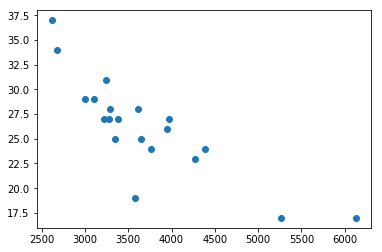

In [81]:
plt.scatter(cars_local.Weight, cars_local.MPG_Highway)

In [82]:
model = cars.regression(alpha=0.05,
                        inputs='weight',
                        target='mpg_highway').Regression
model

,Response,Regressor,Intercept,Linear,Quadratic,Cubic,SSE,SST,RSquare,Corr,NUsed,YMean,XMean,YStd,XStd
0,MPG_Highway,Weight,48.25145,-0.005983,0.0,0.0,5268.591023,14074.511682,0.625664,-0.790989,428.0,26.843458,3577.953271,5.741201,758.983215


In [83]:
linear = model.Linear[0]
intercept = model.Intercept[0]

In [84]:
x = np.array([min(cars_local.Weight),max(cars_local.Weight)])
x

array([2617., 6133.])

In [85]:
y = linear*x + intercept
y

array([32.59313622, 11.55582937])

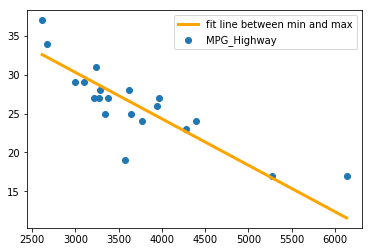

In [86]:
plt.scatter(cars_local.Weight, cars_local.MPG_Highway)
#cars.plot.scatter('Weight', 'MPG_Highway',sample_pct=0.10)
plt.plot(x, y, lw=3, c="orange", label="fit line between min and max")
plt.legend()
plt.show()